In [40]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
from pygimli.physics.SIP.models import modelColeColeRho
import pybert as pb
from pybert.tdip.modelling import ColeColeTD

In [2]:
# %% load data(sheme) container
data = pb.DataContainerERT('synth.shm')
print(data)

Data: Electrodes: 40 data: 728


10/06/23 - 11:35:00 - pyGIMLi - WARNING - Deprecated code usage at:
10/06/23 - 11:35:00 - pyGIMLi - WARNING - None.<module>(C:\Users\Guenther.T\AppData\Local\Temp\ipykernel_19392\3046675505.py:9)
use createParaMeshPLC 


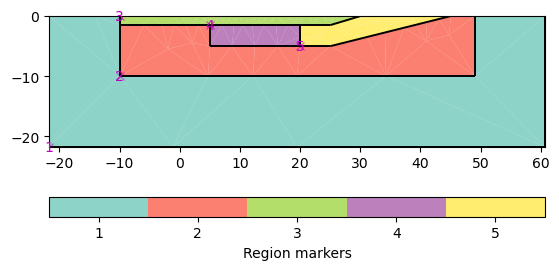

In [3]:
# %% create geometry (poly object)
dTop = -1.5
dSlag = -5.0
xLeft = -10
xRight = 30
xMid = 20
xSlag1 = 5
xSlag2 = 25
geo = mt.createParaDomain2D(data, paraDX=0.5, paraDepth=10,
                           paraBoundary=10, boundary=.3)  # first b=.3,later 3
topsoil = mt.createPolygon([[xLeft, 0], [xLeft, dTop],
                            [xSlag2, dTop], [xRight, 0]],
                           isClosed=True, marker=3)
slag1 = mt.createPolygon([[xSlag1, dTop], [xSlag1, dSlag], [xMid, dSlag],
                          [xMid, dTop]], isClosed=True, marker=4)
slag2 = mt.createPolygon([[xMid, dSlag], [xSlag2, dSlag], [45, 0], [xRight, 0],
                          [xSlag2, dTop], [xMid, dTop]], isClosed=True, marker=5)
plc = geo + topsoil + slag1 + slag2
pg.show(plc);

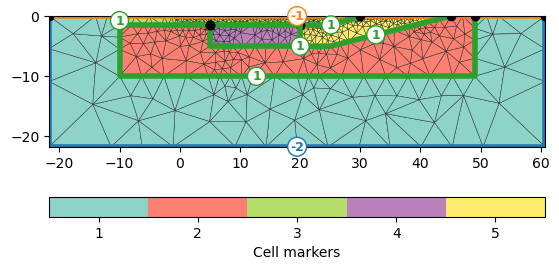

In [4]:
# We save the anomalies for later plotting lines on results
ano = topsoil + slag1 + slag2
ano.exportPLC("geo.poly")
# %% mesh the geometry
mesh = mt.createMesh(plc)
pg.show(mesh, markers=True, showMesh=True);

In [16]:
# the synthetic model
synth = dict(
    rho=np.array([100, 500, 500, 100, 200, 200]),
    m=np.array([0, 0, 0, 0, 0.8, 0.7]),
    tau=np.array([0, 0.001, 0.001, 0.001, 0.03, 0.3]),
    c=np.array([0, 0.25, 0.25, 0.25, 0.5, 0.5]))

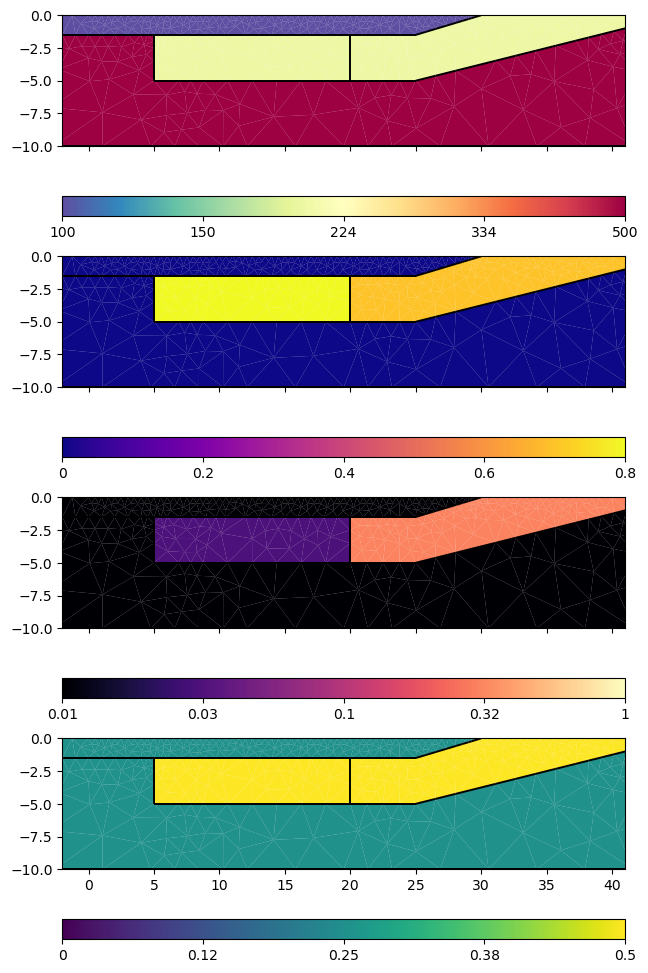

In [17]:
# %%
fig, ax = pg.plt.subplots(nrows=4, figsize=(8, 12), sharex=True, sharey=True)
cm = mesh.cellMarkers()
pg.show(mesh, synth["rho"][cm], ax=ax[0], cMin=100, cMax=500, logScale=True,
        cMap="Spectral_r")
pg.show(mesh, synth["m"][cm], ax=ax[1], cMin=0, cMax=0.8, logScale=0, cMap="plasma")
pg.show(mesh, synth["tau"][cm], ax=ax[2], cMin=0.01, cMax=1, logScale=1, cMap="magma")
pg.show(mesh, synth["c"][cm], ax=ax[3], cMin=0, cMax=0.5, logScale=0, cMap="viridis")
ax[0].set_xlim(-2, 41)
ax[0].set_ylim(-10, 0);

[0.01       0.01211528 0.01467799 0.01778279 0.02154435 0.02610157
 0.03162278 0.03831187 0.04641589 0.05623413 0.06812921 0.08254042
 0.1        0.12115277 0.14677993 0.17782794 0.21544347 0.26101572
 0.31622777 0.38311868 0.46415888 0.56234133 0.68129207 0.82540419
 1.        ]


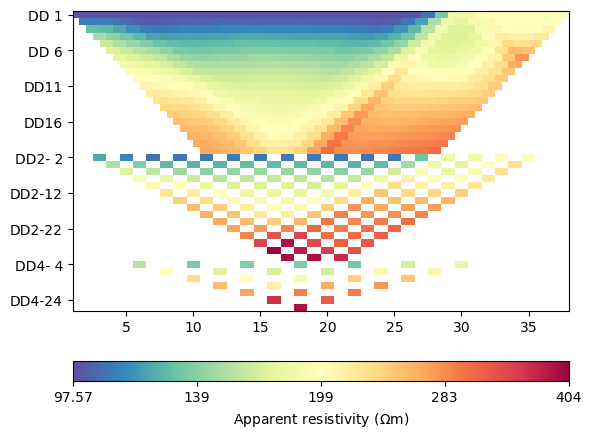

In [35]:
t = np.logspace(-2, 0, 25)
print(t)
res = synth["rho"][mesh.cellMarkers()]
data = ert.simulate(mesh=mesh, scheme=data, res=res)
ert.show(data)
self = pb.TDIP(t=t, data=data)

In [53]:
from pygimli.physics import SIPSpectrum
from scipy.optimize import nnls
i = 4
f = np.logspace(-3, 3, 41)
Z = modelColeColeRho(f, rho=1, m=synth["m"][i], tau=synth["tau"][i], c=synth["c"][i])
# sip = SIPSpectrum(f=f, amp=np.abs(Z), phi=-np.angle(Z))
tau = np.logspace(-2, 2, 41)
T, W = np.meshgrid(tau, f * 2. * np.pi)
A = 1 - 1. / (W*T * 1j + 1)
model, _ = nnls(np.vstack([A.real, A.imag]), np.hstack([Z.real, Z.imag]))
print(model)
# sip.showData()
# ColeColeTD(self.t, jmax=260,
#            m=synth["m"][i], tau=synth["tau"][i], c=synth["c"][i])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.67169206]


array([ 0.99223493,  0.99077189,  0.98903354,  0.98696827,  0.98451497,
        0.98160136,  0.97814205,  0.97403646,  0.9691665 ,  0.96339417,
        0.95655919,  0.94847703,  0.93893766,  0.92770586,  0.91452392,
        0.89911807,  0.88121015,  0.86053596,  0.83687145,  0.81006665,
        0.78008504,  0.74704321,  0.71124268,  0.67318369,  0.63355213,
        0.59317538,  0.55295147,  0.51376374,  0.47639861,  0.44148273,
        0.40944927,  0.38053473,  0.35479989,  0.33216539,  0.31245207,
        0.29541891,  0.28079448,  0.26830039,  0.25766731,  0.24864459,
        0.24100536, -0.00761717, -0.00901996, -0.01067372, -0.01262036,
       -0.0149075 , -0.01758879, -0.02072389, -0.02437805, -0.02862116,
       -0.03352587, -0.0391646 , -0.04560494, -0.05290315, -0.06109529,
       -0.07018582, -0.08013371, -0.09083689, -0.10211654, -0.11370411,
       -0.12523519, -0.13625496, -0.14624014, -0.15463958, -0.1609315 ,
       -0.16468952, -0.16564426, -0.1637255 , -0.15907362, -0.15

In [9]:
mesh0 = pg.Mesh(mesh)
mesh0.setCellMarkers(pg.Vector(mesh0.cellCount()))
fopDC = ert.ERTModelling()
fopDC.setMesh(mesh0)
fopDC.setData(data)
# data["rhoa"] = fopDC.response(rhoVec)
fopDC.createJacobian(rhoVec)
fopIP = pb.tdip.DCIPMModelling(fopDC, mesh, rhoVec)
data["ma"] = fopIP.response(mVec)
pg.show(data, data["ma"]*1000, logScale=False, label=r"$m_a$ (mV/V)", cMap="magma_r");


10/06/23 - 11:35:03 - pyGIMLi - INFO - Found 1 regions.


NameError: name 'rhoVec' is not defined

In [ ]:
self.simulate(mesh, **synth)
self.basename = "synthSlag"
self.saveData()

In [ ]:
# now the actual simulation
if 0:
    frvec = [0.156, 0.312, 0.625, 1.25, 2.5, 5, 10, 20, 40, 80, 125,
            250, 500, 1000]  # SIP256C frequencies
    fdip = pb.FDIP(f=frvec, data=data)
    fdip.simulate(mesh, rho, m, tau, c)
    fdip.basename = "synthSlag"
    fdip.saveData()
    # fdip.generateDataPDF()
    # fdip.generateSpectraPDF()